## Task 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 
warnings.filterwarnings("ignore")

In [2]:
df_bank=pd.read_csv(r'C:/Users/rajan/Prodigy/bank/bank.csv',delimiter=";")

In [3]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df_bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
df_bank.shape

(4521, 17)

In [10]:
df_bank['y'].value_counts() #Class Imbalance

y
no     4000
yes     521
Name: count, dtype: int64

In [11]:
X = df_bank.drop(columns=['contact','y'], axis=1)

In [12]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,other


In [13]:
encode_columns=['job','marital','education','default','housing','loan','month','poutcome']
for i in range(0,len(encode_columns)):
    lb=preprocessing.LabelEncoder()
    X[encode_columns[i]]=lb.fit_transform(X[encode_columns[i]])

In [14]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,6,3,129,4,211,3,1


In [15]:
y = pd.DataFrame(data=df_bank['y'])

In [16]:
y['y']=lb.fit_transform(y['y'])

In [17]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Step 5: Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# Step 6: Make predictions
y_pred = clf.predict(X_test)

In [21]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8839779005524862
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       807
           1       0.46      0.47      0.47        98

    accuracy                           0.88       905
   macro avg       0.70      0.70      0.70       905
weighted avg       0.88      0.88      0.88       905



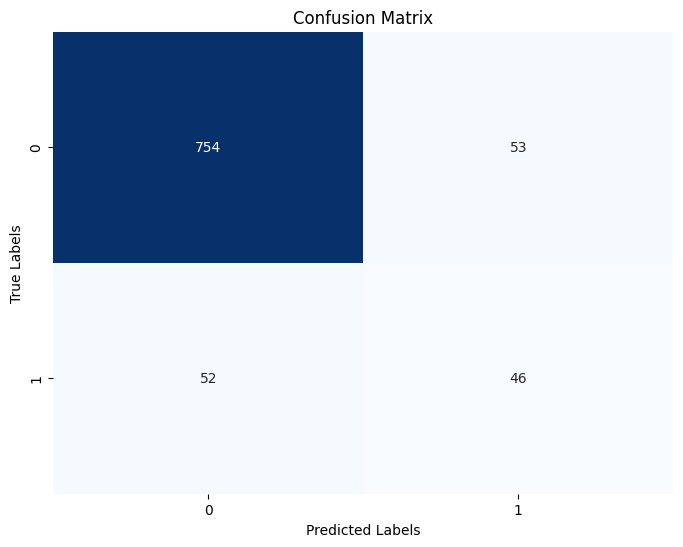

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

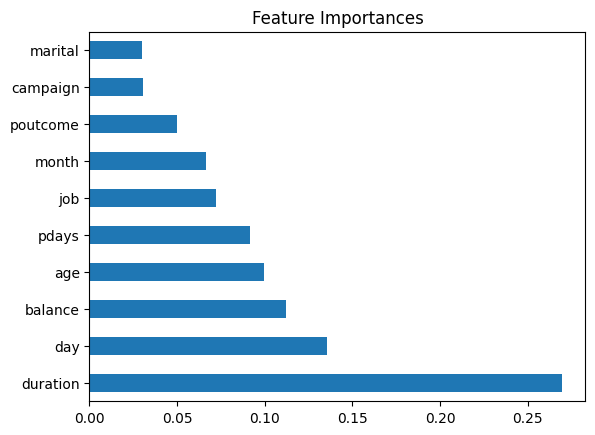

In [23]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()